#  Identifying accents in spectrograms of speech
##  Image preprocessing

### Capstone Project: Microsoft Professional Program Artificial Intelligence

In this notebook I will preprocess the images and convert them to an easy to read format for future use. 

## Data / Image preprocessing

The steps involve are:

- Read the images
- Show some of them
- Rescale them 
- Converto to numpy array and save to disk

### Importing the libraries

In [1]:
# Import libraries
import os
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
import pandas as pd
import numpy as np

%matplotlib inline 

### Read the data images to load and the labels

I will set some global parameters about the location of the datafiles.

In [5]:
root_folder='..\..'
# Where the data resides
data_folder_name='Datasets/speech_data'
# This variable permit us to limit the number of images to work with
images_to_process=4500

# ../input/
DATA_PATH = os.path.abspath(os.path.join(root_folder, data_folder_name))

# Where the train data is stored
train_path = os.path.join(DATA_PATH, "train")

# Where the test data is stored
test_path = os.path.join(DATA_PATH, "test")

# Where the train data is stored
train_images = glob(os.path.join(train_path, "*.png"))

#Save numpy arrays in a compressed file
compressed = True

#Normalize images
img_normalized=False

In [8]:
# Load labels
labels = pd.read_csv(DATA_PATH+'/train_labels.csv')
# Print some labels
df=labels[:10]
for index, row in df.iterrows():
    print('Row: ',row['file_id'],' Label: ', row['accent'])


Row:  10000  Label:  1
Row:  10001  Label:  1
Row:  10002  Label:  0
Row:  10003  Label:  2
Row:  10004  Label:  1
Row:  10005  Label:  1
Row:  10006  Label:  1
Row:  10007  Label:  2
Row:  10008  Label:  0
Row:  10009  Label:  2


### Analize labels distribution

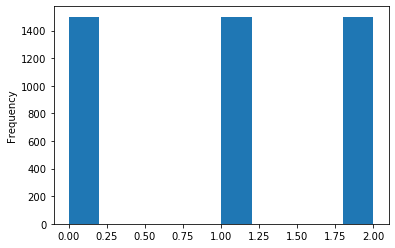

In [13]:
# Show the distribution of labels
labels['accent'].plot.hist()

This means that the dataset is completely balanced.

### Analyze sizes and characteristics in data

In [14]:
# Show some images using matplotlib
import random
r = random.sample(train_images, 16)
img = io.imread(r[0], as_gray=True)

print('Data type: %s' % img.dtype)
print('Min: %.3f Max: %.3f ' %(img.min(),img.max()))

#img= img/255

#print('Data type: %s' % img.dtype)
#print('Min: %.3f Max: %.3f ' %(img.min(),img.max()))


Data type: float64
Min: 0.000 Max: 1.000 


Data is normalized

### Plot some images

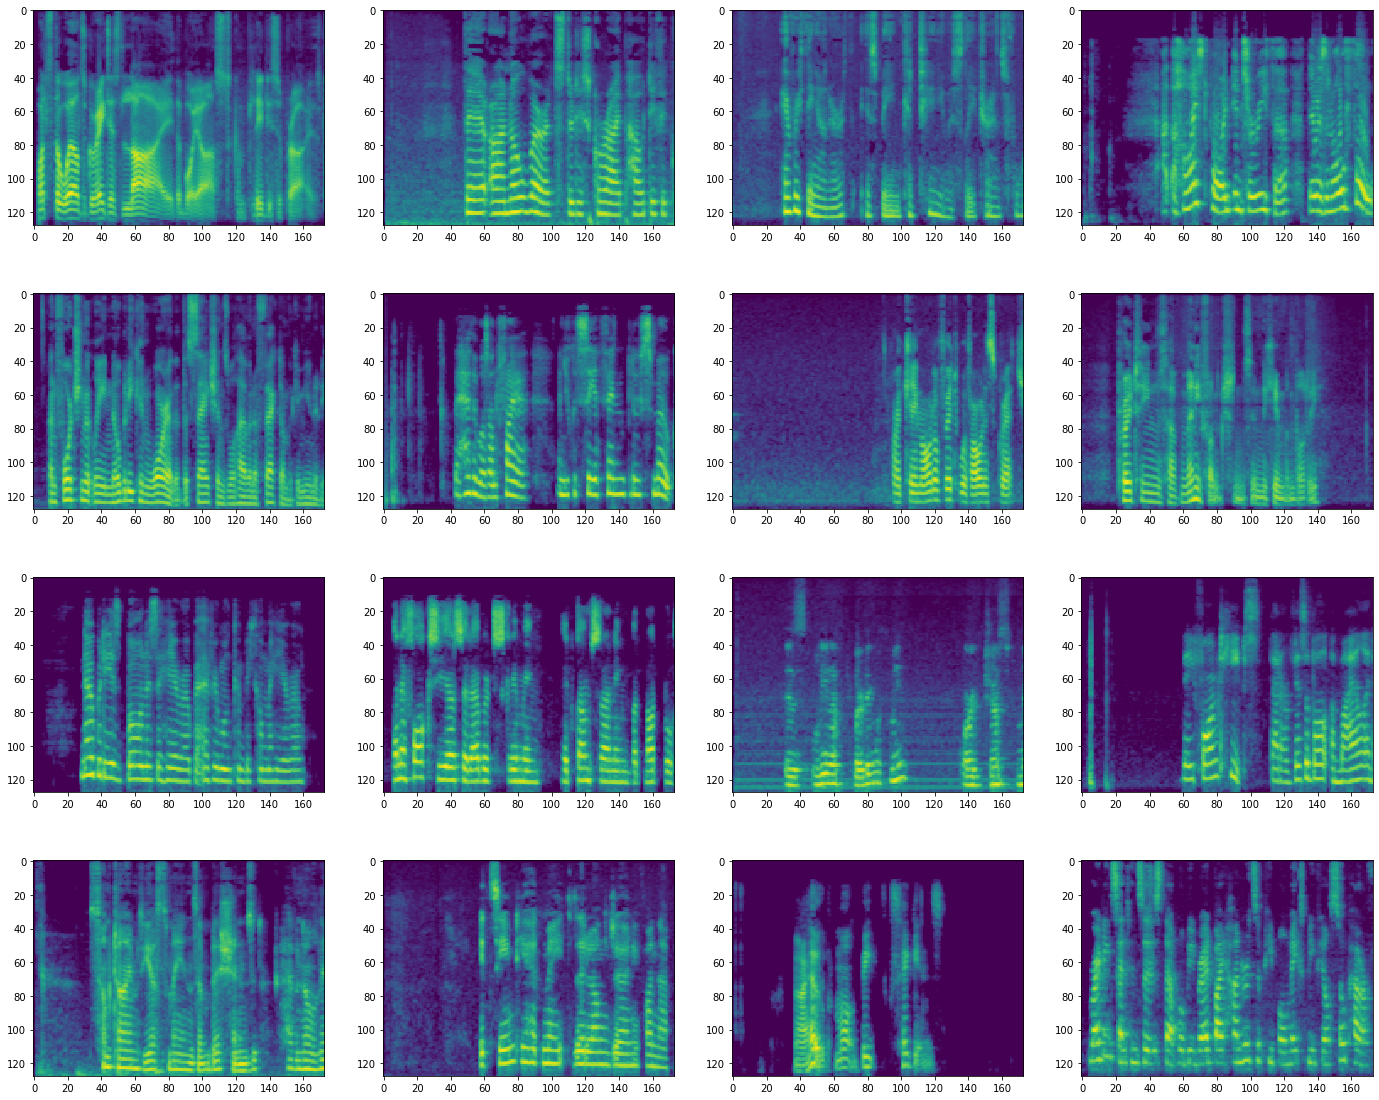

In [16]:
# Set the main variable
images=train_images
# Set the size of the grid where we will plot the images
n_rows=4
n_cols=4
width=20
height = n_rows*6

# Select a random sample from the images to plot
r = random.sample(train_images, n_rows*n_cols)

# Create a figure and subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(height,width))
i=0
# Plot every image in a grid cell
for row in ax:
    for col in row:
        col.imshow(io.imread(r[i], as_gray=True))
        i+=1

plt.show()

### Normalization of images and conversion to numpy array

In [17]:
# Processing the images to normalize them and convert to numpy arrays
def normalize(x):
    ''' Normalize the image x'''
    return (x.astype(float)/255.0)

def proc_images(n,images,labels):
    """ Function to process every image ann label
        Input:
            n: count of images to process
            images: list, filenames of images
            labels: list, label of every image
        Output:
            x: list, images processed
            y: list, labels of the images in x
    """

    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration

    for img in images[:n]:
        base = os.path.basename(img)
        img_file,_ = os.path.splitext(base)
        
        #if labels!=None:
        label = labels["accent"][labels["file_id"] == int(img_file)].values[0]
        y.append(label)

        # Read the image
        my_image = io.imread(img, as_gray=True)
        # Apend to the array and normalize
        if img_normalized:
            x.append(normalize(my_image))
        else:
            x.append(my_image)
        
    return x,y


In [18]:
# Process the images and labels
img_array,label_array=proc_images(images_to_process,train_images,labels)

In [19]:
#Print the size of examples
print('Images: ', len(img_array))
print('Labels:', len(label_array))
print('Image Shape:', img_array[0].shape)

Images:  4500
Labels: 4500
Image Shape: (128, 173)


### Save images and labels as np arrays to disk

In [20]:
if compressed:
    # Save the images as a compressed format file
    np.savez_compressed(DATA_PATH+"/x_images_arrays_zip_"+str(images_to_process), img_array)
else:
    # Save the images 
    np.savez(DATA_PATH+"/x_images_arrays_"+str(images_to_process), img_array)
    
# Save the labels
np.savez(DATA_PATH+"/y_infected_labels_"+str(images_to_process), label_array)